In [27]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LR

In [245]:
dems = pd.read_csv('../datasets/dem_candidates.csv')
fec_house = pd.read_csv('../datasets/totals-2023-12-05T01_07_53.csv')

In [195]:
dems = dems.rename(columns={'Warren Endorsed? ': 'Warren Endorsed?', 'Guns Sense Candidate?': 'Gun Sense Candidate?'})
endorsement_cols = dems.columns[pd.Series(dems.columns).str.contains('Endorsed')].values
endorsement_cols = np.append(endorsement_cols, 'Gun Sense Candidate?')
endorsement_cols = np.append(endorsement_cols, 'Party Support?')
# endorsement_cols = np.append(endorsement_cols, 'Obama Alum?')
# endorsement_cols = np.append(endorsement_cols, 'No Labels Support?')
dems[endorsement_cols] = dems[endorsement_cols].replace({'No': 0, 'Yes': 1})
dems['Total Endorsements'] = dems[endorsement_cols].sum(axis=1)
dems['Endorsed'] = (dems['Total Endorsements'] > 0).astype(int)
dems['Won Primary'] = (dems['Won Primary'] == 'Yes').astype(int)
dems['Race'] = (dems['Race'] == 'Nonwhite').astype(int)
dems['Veteran?'] = (dems['Veteran?'] == 'Yes').astype(int)
dems['LGBTQ?'] = (dems['LGBTQ?'] == 'Yes').astype(int)
dems['Self-Funder?'] = (dems['Self-Funder?'] == 'Yes').astype(int)
dems['STEM?'] = (dems['STEM?'] == 'Yes').astype(int)
dems = dems[dems['Race Type'] == 'Regular']

In [196]:
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [197]:
dems.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Gun Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed?',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?',
       'Total Endorsements', 'Endorsed'],
      dtype='object')

Justice Dems (50), Our Revolution (85), WFP (30), Indivisible (46), VoteVets (28), Emily (54), PCCC (15), Party (39), Gun Sense (193)

In [198]:
endorsement_cols

array(['Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed?',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?',
       'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?',
       'Gun Sense Candidate?', 'Party Support?'], dtype=object)

In [246]:
fec_house.head()

,name,office,office_full,party,party_full,state,district,district_number,election_districts,election_years,...,party.1,office.1,candidate_inactive.1,individual_itemized_contributions,transfers_from_other_authorized_committee,other_political_committee_contributions,state.1,district.1,district_number.1,state_full
0,"SEWELL, TERRI A.",H,House,DEM,DEMOCRATIC PARTY,AL,7,7,"{07,07,07,07,07,07,07,07}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,314433.51,0.00,1453045.73,AL,7,7,Alabama
1,"BERA, AMERISH",H,House,DEM,DEMOCRATIC PARTY,CA,7,7,"{03,07,07,07,07,07,06,06}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,1463699.25,0.00,1193555.00,CA,7,7,California
2,"DESAULNIER, MARK",H,House,DEM,DEMOCRATIC PARTY,CA,11,11,"{10,11,11,11,11,10,10}","{2010,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,177938.55,0.00,344100.00,CA,11,11,California
3,"GARAMENDI, JOHN",H,House,DEM,DEMOCRATIC PARTY,CA,3,3,"{10,03,03,03,03,03,08,08}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,346985.92,0.00,712960.30,CA,3,3,California
4,"SCHIFF, ADAM",H,House,DEM,DEMOCRATIC PARTY,CA,28,28,"{27,29,29,29,29,29,28,28,28,28,28,30,30}","{2000,2002,2004,2006,2008,2010,2012,2014,2016,...",...,DEM,H,f,2955743.08,722929.86,566750.00,CA,28,28,California


In [247]:
fec_house.columns

Index(['name', 'office', 'office_full', 'party', 'party_full', 'state',
       'district', 'district_number', 'election_districts', 'election_years',
       'cycles', 'candidate_status', 'incumbent_challenge',
       'incumbent_challenge_full', 'load_date', 'first_file_date',
       'last_file_date', 'last_f2_date', 'candidate_id', 'two_year_period',
       'candidate_election_year', 'address_city', 'address_state',
       'address_street_1', 'address_street_2', 'address_zip',
       'candidate_inactive', 'active_through', 'candidate_id.1',
       'election_year', 'cycle', 'is_election', 'receipts', 'disbursements',
       'cash_on_hand_end_period', 'debts_owed_by_committee',
       'coverage_start_date', 'coverage_end_date', 'federal_funds_flag',
       'has_raised_funds', 'party.1', 'office.1', 'candidate_inactive.1',
       'individual_itemized_contributions',
       'transfers_from_other_authorized_committee',
       'other_political_committee_contributions', 'state.1', 'district.1

In [248]:
fec_house[fec_house['state'] == 'AL']

,name,office,office_full,party,party_full,state,district,district_number,election_districts,election_years,...,party.1,office.1,candidate_inactive.1,individual_itemized_contributions,transfers_from_other_authorized_committee,other_political_committee_contributions,state.1,district.1,district_number.1,state_full
0,"SEWELL, TERRI A.",H,House,DEM,DEMOCRATIC PARTY,AL,7,7,"{07,07,07,07,07,07,07,07}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,314433.51,0.0,1453045.73,AL,7,7,Alabama
114,"SMITH, JESSE T",H,House,DEM,DEMOCRATIC PARTY,AL,3,3,"{03,03,03}","{2014,2016,2018}",...,DEM,H,f,0.00,0.0,0.00,AL,3,3,Alabama
321,"KENNEDY, ROBERT JR.",H,House,DEM,DEMOCRATIC PARTY,AL,1,1,{01},{2018},...,DEM,H,f,11720.44,0.0,7750.00,AL,1,1,Alabama
322,"ARRAS, JENNIFER O'FARRILL MRS.",H,House,DEM,DEMOCRATIC PARTY,AL,1,1,{01},{2018},...,DEM,H,f,0.00,0.0,0.00,AL,1,1,Alabama
324,"MCCONNELL, LIZZETTA HILL",H,House,DEM,DEMOCRATIC PARTY,AL,1,1,{01},{2018},...,DEM,H,f,2735.00,0.0,0.00,AL,1,1,Alabama
331,"WILLIAMS, AUDRI SCOTT 1955",H,House,DEM,DEMOCRATIC PARTY,AL,2,2,{02},{2018},...,DEM,H,f,26117.00,0.0,0.00,AL,2,2,Alabama
338,"ISNER, TABITHA KAY",H,House,DEM,DEMOCRATIC PARTY,AL,2,2,{02},{2018},...,DEM,H,f,305482.95,0.0,8605.00,AL,2,2,Alabama
346,"HAGAN, MALLORY",H,House,DEM,DEMOCRATIC PARTY,AL,3,3,{03},{2018},...,DEM,H,f,215160.38,0.0,30500.00,AL,3,3,Alabama
364,"WINFREY, ADIA MCCLELLAN DR",H,House,DEM,DEMOCRATIC PARTY,AL,3,3,"{03,03}","{2018,2020}",...,DEM,H,f,2765.00,0.0,0.00,AL,3,3,Alabama
368,"NEIGHBORS, RICKY ALLEN",H,House,DEM,DEMOCRATIC PARTY,AL,4,4,"{04,04,04}","{2018,2020,2022}",...,DEM,H,f,18177.35,0.0,500.00,AL,4,4,Alabama


In [244]:
dems[dems['State'] == 'AL'][['Candidate', 'Self-Funder?']]

,Candidate,Self-Funder?
0,Anthony White (Alabama),No
1,Christopher Countryman,No
2,"Doug ""New Blue"" Smith",No
3,James C. Fields,No
4,Sue Bell Cobb,No
5,Walt Maddox,No
6,Lizzetta Hill McConnell,No
7,Robert Kennedy Jr.,No
8,Audri Scott Williams,No
9,Tabitha Isner,No


## Inverse Propensity Weighting: Our Revolution

- Y (outcome): `'Won Primary'`
- Z (treatment): `'Our Revolution Endorsed?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'Self-Funder?'`, `'STEM?'`

In [200]:
our_rev = dems[dems['Our Revolution Endorsed?'].notnull() == True][['Won Primary', 'Our Revolution Endorsed?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?', 'STEM?']].reset_index().drop(columns=['index'])
our_rev.head()

,Won Primary,Our Revolution Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?
0,0,0.0,0.0,25.83,1,0,0,0,1
1,0,0.0,0.0,25.83,0,1,0,0,0
2,0,0.0,0.0,25.83,1,0,0,0,0
3,0,0.0,0.0,25.83,1,0,0,0,0
4,0,1.0,2.0,25.83,0,0,0,0,0


In [201]:
# creating our treatment, outcome, and confounder arrays
Z = our_rev['Our Revolution Endorsed?'].values
Y = our_rev['Won Primary'].values
X = our_rev.drop(['Our Revolution Endorsed?', 'Won Primary'], axis=1).to_numpy()

In [202]:
# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

In [203]:
# function for estimating treatment effect
def estimate_treatment_effect(model, X, Y, Z):
    return np.mean((Z * Y / model.predict_proba(X)[:, 1]) - ((1 - Z) * Y / model.predict_proba(X)[:, 0]))

In [204]:
estimate_treatment_effect(fit, X, Y, Z)

-0.22649504140208687

Since this is a negative number, the treatment (being endorsed by `Our Revolution`) caused the probability of winning to decrease.

In [205]:
# naive estimator from HW4, not sure if we need for this
# the naive estimator does not account for confounders!
# Interesting... once we control for confounders, we observe the opposite effect (positive to negative)
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.11162599114406344

### Adding the propensity scores

In [206]:
our_rev['pscore'] = fit.predict_proba(X)[:, 1]
our_rev.head()

,Won Primary,Our Revolution Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?,pscore
0,0,0.0,0.0,25.83,1,0,0,0,1,0.012850
1,0,0.0,0.0,25.83,0,1,0,0,0,0.003500
2,0,0.0,0.0,25.83,1,0,0,0,0,0.015068
3,0,0.0,0.0,25.83,1,0,0,0,0,0.015068
4,0,1.0,2.0,25.83,0,0,0,0,0,0.334576


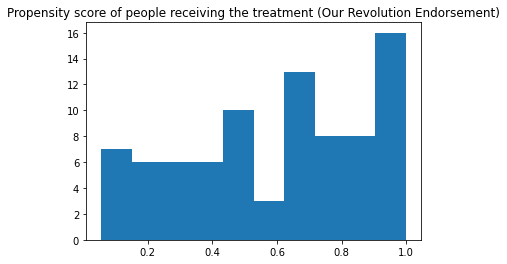

In [207]:
plt.hist(our_rev[our_rev['Our Revolution Endorsed?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Our Revolution Endorsement)");

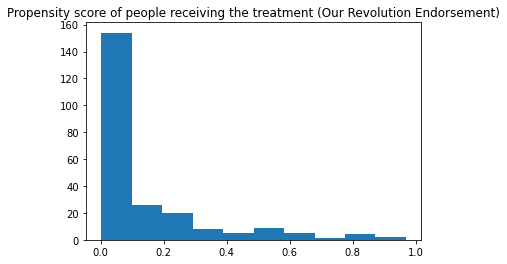

In [208]:
plt.hist(our_rev[our_rev['Our Revolution Endorsed?'] == 0]['pscore']);
plt.title("Propensity score of people receiving the treatment (Our Revolution Endorsement)");

### IPW Estimate

In [226]:
reweighted_treated = (our_rev[our_rev['Our Revolution Endorsed?'] == 1]['Won Primary'] / our_rev[our_rev['Our Revolution Endorsed?'] == 1]['pscore']).sum()
reweighted_control = (our_rev[our_rev['Our Revolution Endorsed?'] == 0]['Won Primary'] / (1 - our_rev[our_rev['Our Revolution Endorsed?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(our_rev)
ipw_estimate

-0.22649504140208687

In [227]:
obs_filt = our_rev[our_rev['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Our Revolution Endorsed?'] == 1]['Won Primary'] / obs_filt[obs_filt['Our Revolution Endorsed?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Our Revolution Endorsed?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Our Revolution Endorsed?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
trimmed_ipw_estimate

-0.32494983733297716

## Inverse Propensity Weighting: Party Support

- Y (outcome): `'Won Primary'`
- Z (treatment): `'Party Support?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'Self-Funder?'`, `'STEM?'`

In [228]:
party = dems[dems['Party Support?'].notnull() == True][['Won Primary', 'Party Support?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?', 'STEM?']].reset_index().drop(columns=['index'])
party['Total Other Endorsements'] = party['Total Endorsements'] - party['Party Support?']
party = party.drop(columns=['Total Endorsements'])
party.head()

,Won Primary,Party Support?,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?,Total Other Endorsements
0,1,1.0,-13.51,0,0,0,0,0,1.0
1,0,0.0,-13.51,0,1,0,0,0,1.0
2,0,0.0,-13.51,1,0,0,0,0,0.0
3,0,0.0,-13.51,0,0,0,0,0,0.0
4,0,0.0,0.62,0,0,0,0,1,2.0


In [229]:
# creating our treatment, outcome, and confounder arrays
Z = party['Party Support?'].values
Y = party['Won Primary'].values
X = party.drop(['Party Support?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

estimate_treatment_effect(fit, X, Y, Z)

0.8693583538150906

In [230]:
# the naive estimator does not account for confounders!
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.9184149184149184

### Adding the propensity scores

In [231]:
party['pscore'] = fit.predict_proba(X)[:, 1]
party.head()

,Won Primary,Party Support?,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?,Total Other Endorsements,pscore
0,1,1.0,-13.51,0,0,0,0,0,1.0,0.372104
1,0,0.0,-13.51,0,1,0,0,0,1.0,0.504320
2,0,0.0,-13.51,1,0,0,0,0,0.0,0.209023
3,0,0.0,-13.51,0,0,0,0,0,0.0,0.201965
4,0,0.0,0.62,0,0,0,0,1,2.0,0.335665


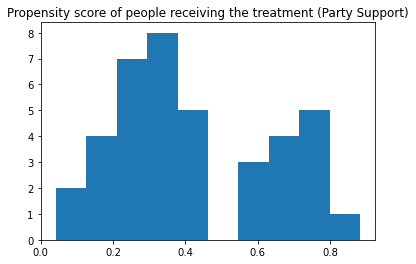

In [232]:
plt.hist(party[party['Party Support?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Party Support)");

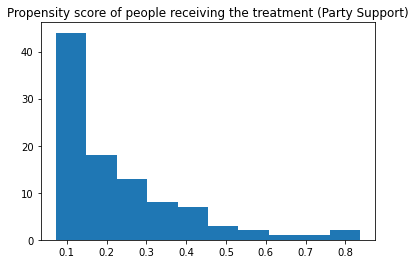

In [233]:
plt.hist(party[party['Party Support?'] == 0]['pscore']);
plt.title("Propensity score of people receiving the treatment (Party Support)");

### IPW Estimate

In [234]:
reweighted_treated = (party[party['Party Support?'] == 1]['Won Primary'] / party[party['Party Support?'] == 1]['pscore']).sum()
reweighted_control = (party[party['Party Support?'] == 0]['Won Primary'] / (1 - party[party['Party Support?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(party)
print('IPW estimate:', ipw_estimate)

obs_filt = party[party['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Party Support?'] == 1]['Won Primary'] / obs_filt[obs_filt['Party Support?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Party Support?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Party Support?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
print('trimmed IPW estimate:', trimmed_ipw_estimate)

IPW estimate: 0.8693583538150904
trimmed IPW estimate: 0.7935495457385874
